<a href="https://colab.research.google.com/github/dtsri/truthinbytes/blob/main/Restaurant_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset attributes -**

**1) Id - Restaurant Id
2) Name - Name of the Restaurant
3) Franchise - Restaurant is having franchise or not
4) Category - specific type of category provided by restaurant
5) No_of_item - Different types of items provided by restaurant
6) Order_Placed - Order placed by customer to restaurant(in lacs)
7) Revenue - Total amount of income generated by the restaurant**


**Problem Statement:
Create a machine learning model to predict revenue of the restaurant based on the features present in the dataset.**

**Import the necessary packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
restaurant = pd.read_csv('/content/revenue_prediction (3).csv')

In [3]:
restaurant

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [4]:
#checking nulls
restaurant.isnull().sum()

,0
Id,0
Name,0
Franchise,0
Category,0
City,0
No_Of_Item,0
Order_Placed,0
Revenue,0


In [5]:
#duplicates
restaurant.duplicated().sum()

np.int64(0)

In [6]:
#info
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [7]:
#checking for outliers
restaurant.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [8]:
#unique values
restaurant.nunique()

,0
Id,100
Name,100
Franchise,2
Category,20
City,5
No_Of_Item,53
Order_Placed,55
Revenue,100


In [9]:
#top restaurants with most orders and their revenue
top_restaurants = restaurant.sort_values(by = 'Order_Placed', ascending = False).head(10)

In [10]:
top_restaurants

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
75,176,WhichWich,No,Bakery Cafe,Bengaluru,126,13.0,16549064
16,117,ZoesKitchen,Yes,Burger,Bengaluru,123,10.8,19696939
24,125,Schlotzsky's,Yes,BBQ,Mumbai,110,8.8,7904084
49,150,Sizzler,No,Varied Menu,Gurugram,117,8.5,8630682
17,118,CornerBakery_Cafe,Yes,Asian,Gurugram,100,8.1,7513524
47,148,Smashburger,No,Family Casual,Bengaluru,85,7.7,7865428
85,186,Sweetgreen,No,Pizza,Noida,80,7.2,7495092
48,149,Wienerschnitzel,No,Varied Menu,Bengaluru,95,7.1,7201784
55,156,Mastro'sRestaurants,No,Sandwich,Mumbai,79,6.8,6941173
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131


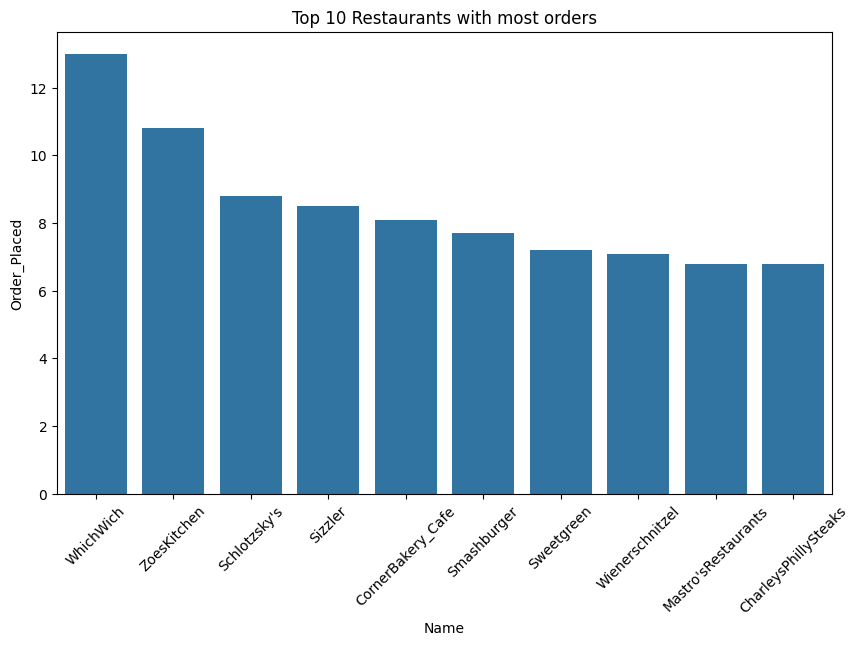

In [11]:
#visualize top 10 restaurants
plt.figure(figsize = (10,6))
sns.barplot(x = 'Name', y = 'Order_Placed', data = top_restaurants)
plt.title('Top 10 Restaurants with most orders')
plt.xticks(rotation = 45)
plt.show()

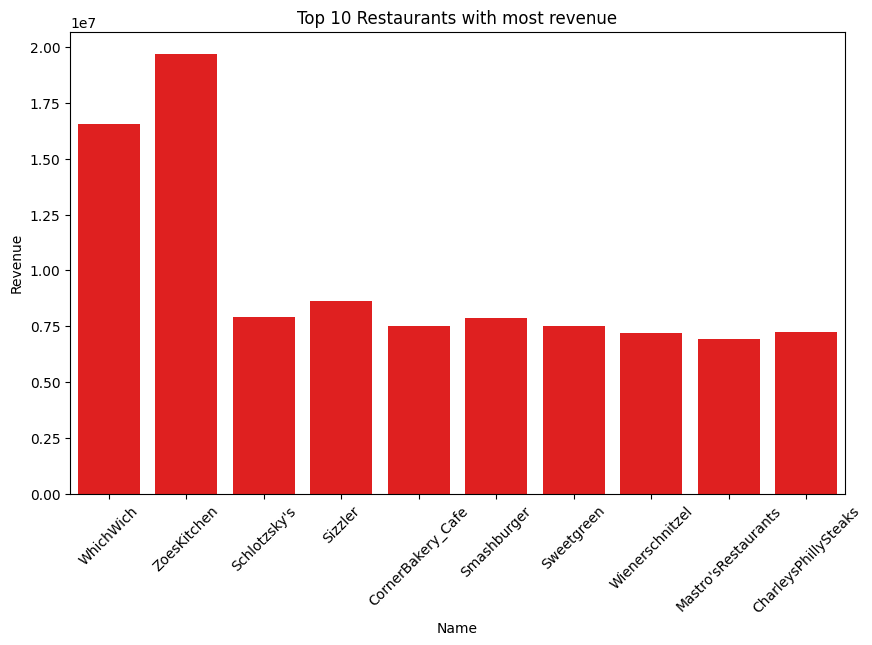

In [12]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Name', y = 'Revenue', data = top_restaurants , color = 'red')
plt.title('Top 10 Restaurants with most revenue')
plt.xticks(rotation = 45)
plt.show()

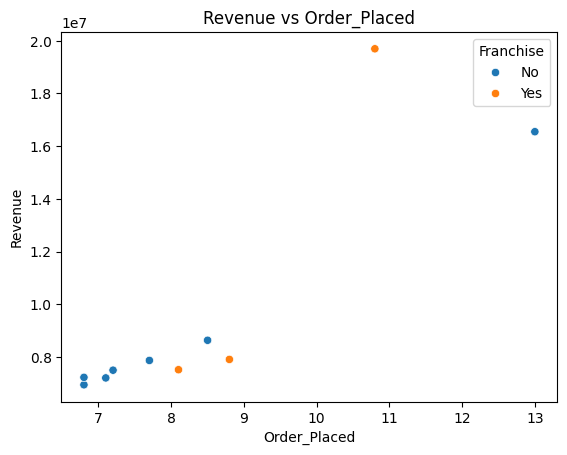

In [13]:
#the more number of orders is, the more is the revenue (from the plot)
#comparing if top restaurants also have more revenue
sns.scatterplot(x= 'Order_Placed', y = 'Revenue', hue = 'Franchise', data = top_restaurants)
plt.title('Revenue vs Order_Placed')
plt.show()

In [14]:
#checking if these top resturants belong to a category
top_restaurants['Category'].value_counts()

,count
Category,
Varied Menu,3
Bakery Cafe,1
Burger,1
BBQ,1
Asian,1
Family Casual,1
Pizza,1
Sandwich,1


In [15]:
#checking if categories affect the orders and revenue
top_restaurant_categories = restaurant.groupby('Category')[['Order_Placed', 'Revenue']].mean().sort_values(by = 'Order_Placed', ascending = False).head(10)

In [16]:
top_restaurant_categories

,Order_Placed,Revenue
Category,,
Asian,8.100000,7.513524e+06
Healthy,5.700000,5.966193e+06
BBQ,5.550000,5.542483e+06
Varied Menu,5.281250,5.509978e+06
Bakery Cafe,4.740000,5.749800e+06
Seafood,4.450000,4.491006e+06
Asian/Noodle,4.200000,4.428070e+06
Burger,4.114286,5.506968e+06
Steak,4.071429,4.256952e+06


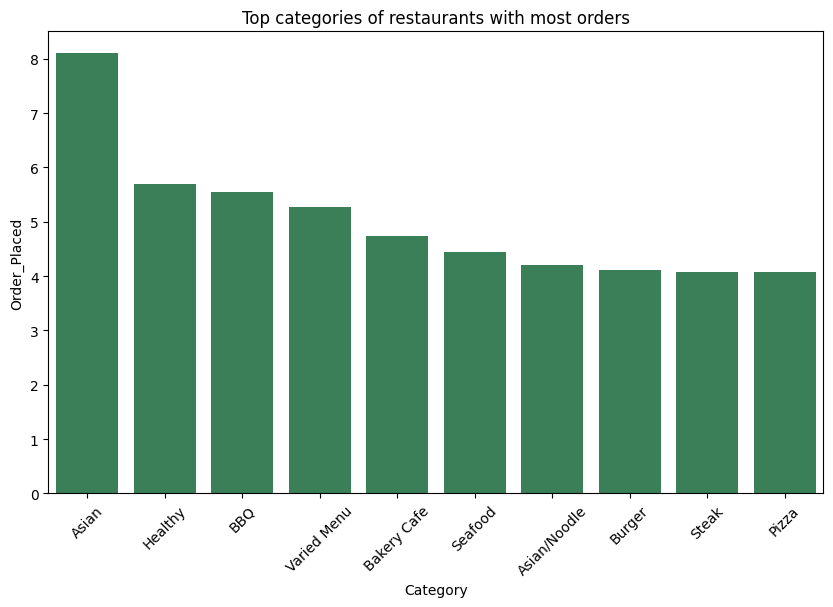

In [17]:
#plotting the same
plt.figure(figsize = (10,6))
sns.barplot(x = 'Category', y = 'Order_Placed', data = top_restaurant_categories , color = 'seagreen')
plt.title('Top categories of restaurants with most orders')
plt.xticks(rotation = 45)
plt.xlabel('Category')
plt.ylabel('Order_Placed')
plt.show()

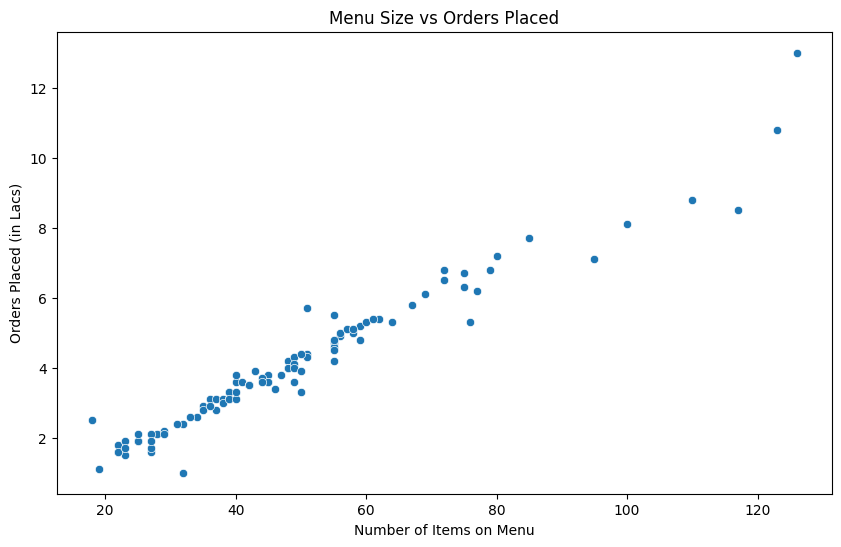

In [18]:
#if there is a relationship between no of item and orders placed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No_Of_Item', y='Order_Placed', data=restaurant)
plt.title('Menu Size vs Orders Placed')
plt.xlabel('Number of Items on Menu')
plt.ylabel('Orders Placed (in Lacs)')
plt.show()

In [19]:
#we can also use heatmap to find the coorelation
plt.figure(figsize = (10,6))
sns.heatmap(restaurant.corr(), annot = True)
plt.show()

ValueError: could not convert string to float: "HungryHowie'sPizza"

<Figure size 1000x600 with 0 Axes>

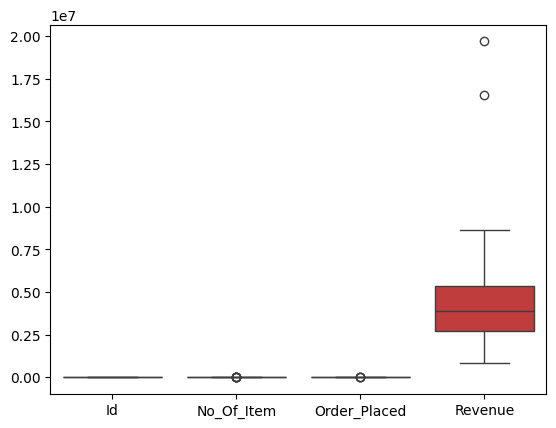

In [20]:
#checking outliers
sns.boxplot(data = restaurant)
plt.show()

**Machine learning/Model building**

In [21]:
restaurant.dtypes

,0
Id,int64
Name,object
Franchise,object
Category,object
City,object
No_Of_Item,int64
Order_Placed,float64
Revenue,int64


In [22]:
#since we have objects dtypes so label encoding to perform
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [64]:
#since we have objects dtypes so label encoding to perform
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

# Applying Label Encoding only to the specified categorical columns in the original data
for col in ['Franchise', 'Category', 'City']:
  restaurant[col] = Le.fit_transform(restaurant[col])

In [65]:
restaurant.info() #checking again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    int64  
 2   Franchise     100 non-null    int64  
 3   Category      100 non-null    int64  
 4   City          100 non-null    int64  
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 6.4 KB


In [66]:
#import necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
#splitting the data and revenue is our target column
X = restaurant.drop(columns = ['Revenue', 'Id', 'Name']) #independant
y = restaurant['Revenue'] #dependant

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Linear Regression**

In [69]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = LR.predict(X_test)

In [71]:
y_pred

array([6666479.57324263, 5639644.54872309, 3805536.39463167,
       4193324.18078208, 4343130.14047885, 3771286.28284555,
       3975231.17369166, 3538465.19057696, 4008270.62952065,
       6564461.36756485, 5475587.89962776, 3049610.70004873,
       2810473.9006414 , 2279966.85189423, 3582880.67553956,
       4520150.55828419, 5132586.00030909, 1439624.56657968,
       1771028.10021913, 2139029.64016056])

In [72]:
y_test

,Revenue
83,5966193
53,5595267
70,3982767
45,3752885
44,4264176
39,3818055
22,4956086
80,3727364
10,3945135
0,5953753


In [73]:
from sklearn.metrics import *
r2_score(y_test, y_pred)

0.8639287715046499

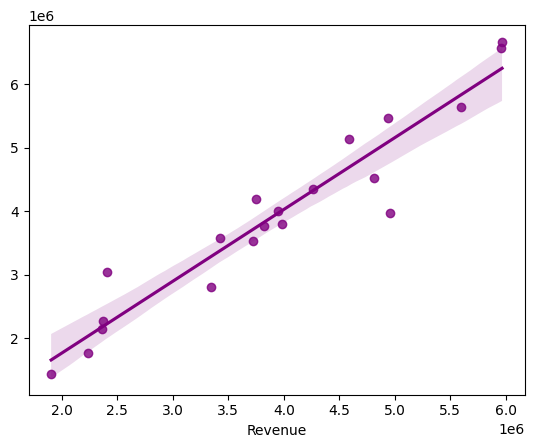

In [74]:
#plotting
sns.regplot(x = y_test, y = y_pred, color = 'purple')
plt.show()

In [75]:
#since its a regression problem we can also check with decision tree and random forest

**Random Forest**

In [76]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor()
Rf.fit(X_train, y_train)

RandomForestRegressor()

In [77]:
y_pred_rf = Rf.predict(X_test)

In [78]:
r2_score(y_test, y_pred_rf)

0.8180180873966549

**Decision Tree**

In [79]:
from sklearn.tree import DecisionTreeRegressor
Dt = DecisionTreeRegressor()
Dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [80]:
y_pred_dt = Dt.predict(X_test)

In [81]:
r2_score(y_test, y_pred_dt)

0.41030668476343213

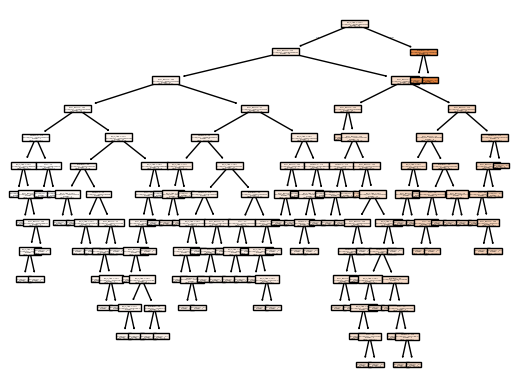

In [82]:
from sklearn import tree
X_columns = X.columns
tree = tree.plot_tree(Dt, feature_names = X_columns, filled = True)